In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train)


60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

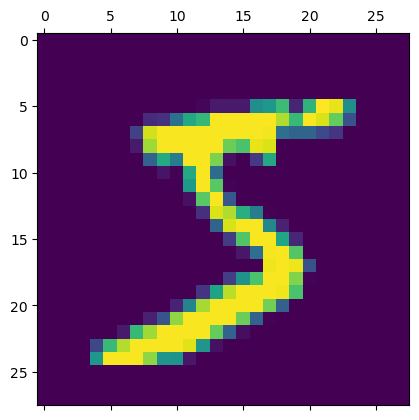

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[2]

4

In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train=X_train/255
X_test=X_test/255

In [11]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [12]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

)
model.fit(X_train_flattened,y_train,epochs=5)



Epoch 1/5


1875/1875 [==============================] - 4s 2ms/step - loss: 0.4715 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3038 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2831 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9227
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2664 - accuracy: 0.9256


In [13]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2671 - accuracy: 0.9252


[0.2670736312866211, 0.9251999855041504]

In [14]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([1.6164865e-02, 2.0807651e-07, 3.1945303e-02, 9.4843829e-01,
       2.4881067e-03, 1.0067415e-01, 1.5863646e-06, 9.9974960e-01,
       7.7917114e-02, 6.1027378e-01], dtype=float32)

In [15]:
np.argmax(y_predicted[0])

7

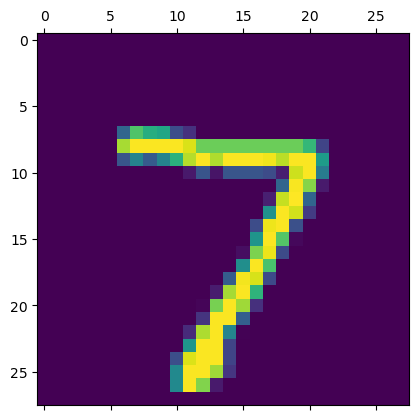

In [16]:
plt.matshow(X_test[0])

In [17]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [18]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [19]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    5,    7,    2,    2,    1],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   5,    9,  912,   21,   11,    2,   13,   11,   45,    3],
       [   2,    0,   12,  924,    1,   27,    2,   10,   25,    7],
       [   1,    1,    2,    1,  924,    0,   12,    4,   10,   27],
       [   7,    1,    3,   33,   10,  775,   18,    7,   32,    6],
       [   9,    3,    7,    1,    8,    9,  916,    2,    3,    0],
       [   1,    5,   20,    8,    9,    0,    0,  953,    4,   28],
       [   5,    6,    5,   25,    9,   27,   10,   11,  870,    6],
       [  10,    5,    1,   11,   33,    6,    0,   26,    9,  908]])>

Text(95.72222222222221, 0.5, 'Truth')

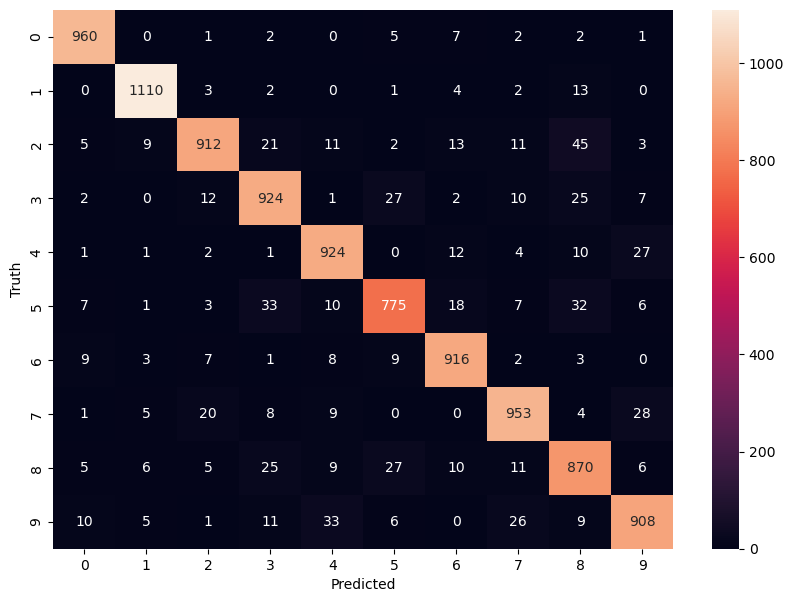

In [20]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2705 - accuracy: 0.9226
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1266 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0880 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0669 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0523 - accuracy: 0.9836


In [22]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0791 - accuracy: 0.9759


[0.07907666265964508, 0.9758999943733215]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

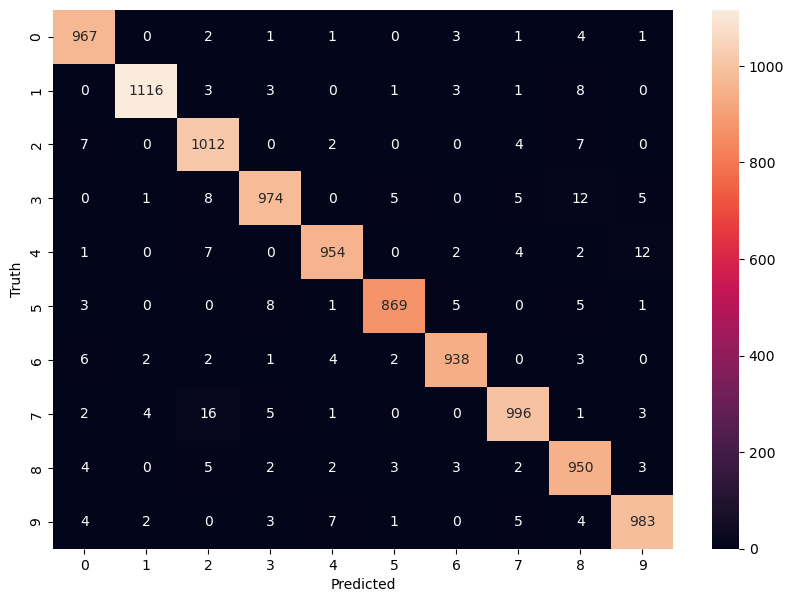

In [23]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
tb_callback=tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10,callbacks=[tb_callback])

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6628 - accuracy: 0.8335
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3375 - accuracy: 0.9057
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2867 - accuracy: 0.9194
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2559 - accuracy: 0.9290
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2331 - accuracy: 0.9351
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2152 - accuracy: 0.9396
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2002 - accuracy: 0.9441
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1875 - accuracy: 0.9472
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1762 - accuracy: 0.9507
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.166

In [25]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0874 - accuracy: 0.9773


[0.08739139139652252, 0.9772999882698059]

In [30]:
%tensorboard --logdir logs/

UsageError: Line magic function `%tensorboard` not found.


In [36]:
%load_ext tensorboard
%tensorboard --logdir logs/


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 11160), started 0:11:55 ago. (Use '!kill 11160' to kill it.)